In [735]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import re
from collections import Counter
import math

[nltk_data] Downloading package punkt to /Users/sonic7/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [736]:
# Part 1

statements = pd.read_csv('statements.csv')
stop_words = pd.read_fwf('NLTK_English_stopwords.txt', names = ['stop_words'])
statements

,id,speaker,text
0,0,obama,"During the recession, Marvin’s competitors clo..."
1,1,obama,And we will rise or fall on that journey as on...
2,2,obama,My -- My differences with him -- My difference...
3,3,obama,That's why we've excluded lobbyists from polic...
4,4,obama,I recognize that many still have a strong desi...
5,5,obama,It's been used by many past Presidents -- Repu...
6,6,obama,Al Qaeda has said it seeks a bomb and that it ...
7,7,obama,I am honored -- I'm honored and grateful to be...
8,8,obama,It was bought with days in jail cells and nigh...
9,9,obama,"A hundred and fifty years ago, we were torn op..."


In [737]:
def notInStopWords(word):
    for i in range(len(stop_words.stop_words)):
        if (stop_words.stop_words[i] == word):
            return False
    return True

obama_words = []
obamaAllWords = []
trumpAllWords = []
trump_words = []
all_words = []

for i in range(len(statements.index)):
    # Removing all stop words and punctuation
    sentence = list(filter(notInStopWords, (re.sub(r'[^A-Za-z ]+', '', (statements.text[i]).lower()).split())))
    all_words += sentence
    if (statements.speaker[i] == "obama"):
        obama_words += sentence
        obamaAllWords += (re.sub(r'[^A-Za-z ]+', '', (statements.text[i]).lower()).split())
    else:
        trump_words += sentence
        trumpAllWords += (re.sub(r'[^A-Za-z ]+', '', (statements.text[i]).lower()).split())
obama_words_frequency = dict(Counter(obama_words))
trump_words_frequency = dict(Counter(trump_words))

# Taking the top 1000 most frequent words for both obama and trump
obama_words_most_frequent = dict(Counter(obama_words).most_common(1000))
trump_words_most_frequent = dict(Counter(trump_words).most_common(1000))
all_words_frequency = dict(Counter(all_words))

# Top 1000 of words spoken by Trump + top 1000 of words spoken by Obama
choice_of_words = list(set(list(obama_words_most_frequent.keys()) + list(trump_words_most_frequent.keys())))
print(len(choice_of_words))

1644


In [738]:
table = pd.DataFrame(choice_of_words, columns = ['Word'])
numOccurances = []
trumpOccurances = []
obamaOccurances = []
phiCoefficients = []

for i in range (len(choice_of_words)):
    awf = all_words_frequency.get(choice_of_words[i])
    twf = trump_words_frequency.get(choice_of_words[i])
    owf = obama_words_frequency.get(choice_of_words[i])
    if twf is None:
        twf = 0
    if owf is None:
        owf = 0
    numOccurances.append(awf)
    trumpOccurances.append(twf)
    obamaOccurances.append(owf)
    
    # Making phi coefficient
    a = sum(obama_words_most_frequent.values()) - owf
    b = sum(trump_words_most_frequent.values()) - twf
    c = owf
    d = twf
    e = a + b
    f = c + d
    g = sum(obama_words_most_frequent.values())
    h = sum(trump_words_most_frequent.values())
    phiCoeff = ((a * d) - (b * c)) / math.sqrt(e * f * g * h)
    phiCoefficients.append(phiCoeff)
    

# Making the table
table['# of Occurances'] = numOccurances
table['Trump # of Occurances'] = trumpOccurances
table['Obama # of Occurances'] = obamaOccurances
table['Phi Coefficients'] = phiCoefficients

totalTrumpWords = table['Trump # of Occurances'].sum()
totalObamaWords = table['Obama # of Occurances'].sum()


# Full Table
pd.set_option('display.max_rows', None)
display(table.sort_values(by = ['# of Occurances'], ascending = False))

,Word,# of Occurances,Trump # of Occurances,Obama # of Occurances,Phi Coefficients
1180,going,114,99,15,0.089180
1537,people,107,64,43,0.016094
886,know,72,56,16,0.051366
1485,said,58,46,12,0.048974
1088,thats,48,24,24,-0.006276
610,country,47,29,18,0.013855
1521,one,46,30,16,0.019669
277,want,45,27,18,0.010700
1127,like,43,31,12,0.030285
1009,im,42,34,8,0.044283


In [739]:
# Displaying highest phi coeffs
display(table.sort_values(by=['Phi Coefficients'], ascending = False).head(10))

,Word,# of Occurances,Trump # of Occurances,Obama # of Occurances,Phi Coefficients
1180,going,114,99,15,0.089180
853,think,42,38,4,0.059715
886,know,72,56,16,0.051366
1485,said,58,46,12,0.048974
1009,im,42,34,8,0.044283
1169,look,18,17,1,0.043221
382,hes,21,19,2,0.042156
284,great,34,28,6,0.041859
1145,big,13,13,0,0.041713
1170,love,13,13,0,0.041713


In [740]:
# Displaying lowest phi coeffs
display(table.sort_values(by=['Phi Coefficients']).head(10))

,Word,# of Occurances,Trump # of Occurances,Obama # of Occurances,Phi Coefficients
13,must,27,5,22,-0.045550
627,health,11,0,11,-0.044357
1578,today,17,2,15,-0.043064
560,years,19,3,16,-0.041156
376,across,8,0,8,-0.037819
385,act,8,0,8,-0.037819
700,together,11,1,10,-0.036836
1041,thank,14,2,12,-0.036718
257,rights,7,0,7,-0.035373
1105,government,7,0,7,-0.035373


In [741]:
# Part 2

def naiveBayes(fullsentence):
    sentence = list(filter(notInStopWords, (re.sub(r'[^A-Za-z ]+', '', fullsentence.lower()).split())))
    trumpNum = 0
    obamaNum = 0
    
    for i in range (len(sentence)):
        twf = trump_words_frequency.get(sentence[i])
        owf = obama_words_frequency.get(sentence[i])
        if twf is None:
            twf = 0
        if owf is None:
            owf = 0
        trumpNum +=  math.log((twf + 1) / totalTrumpWords)
        obamaNum +=  math.log((owf + 1) / totalObamaWords)
        
    trumpNum += math.log(totalTrumpWords / (totalTrumpWords + totalObamaWords))
    obamaNum += math.log(totalObamaWords / (totalTrumpWords + totalObamaWords))
    
    return trumpNum, obamaNum

Accuracy: 0.964
Sensitivity: 0.966
Specificity: 0.962
Precision: 0.9621513944223108
F1-Score: 0.9640718562874252


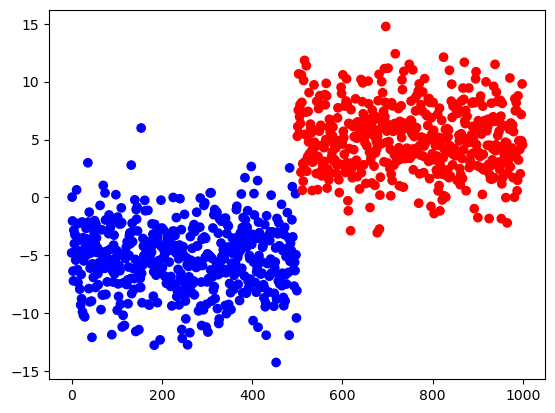

In [742]:
# Make a list to calculate differences
differences = []

tp = 0
tn = 0
fp = 0
fn = 0

# Use predict on the original sentences in the dataset to get the score difference
for i in range(len(statements['text'])):
    trump, obama = naiveBayes(statements['text'][i])
    
    diff = trump - obama

    # Add this difference to the list of differences
    differences.append(diff)
    
    
    true = 'Obama' if i < 500 else 'Trump'
    pred = 'Trump' if diff > 0 else 'Obama'
    
    
    if true == 'Trump' and pred == 'Trump':
        tp += 1
    elif true == 'Obama' and pred == 'Obama':
        tn += 1
    elif true == 'Obama' and pred == 'Trump':
        fp += 1
    elif true == 'Trump' and pred == 'Obama':
        fn += 1
        

# Calculate scores        
accuracy = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)


print('Accuracy:', accuracy)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Precision:', precision)
print('F1-Score:', f1_score)

colors = ['blue' if i < 500 else 'red' for i in range(len(differences))]
plt.scatter([i for i in range(len(differences))], differences, c = colors)

In [743]:
# Part 3

# Selected words by highest phi coeffs
knnWords = list((table.sort_values(by='Phi Coefficients', ascending=False).iloc[:1500])['Word'])
vectors = []

#Function given in lab
def word_vector(words, word_list, use_frequency = False):
    word_list = sorted(list(set(word_list)))

    if use_frequency:    
        count = Counter(words)
        return [count[w] for w in word_list]
    else:
        return [int(w in words) for w in word_list]


# Make the vectors for each sentence
for i in range(len(statements['text'])):
    statement = (re.sub(r'[^A-Za-z ]+', '', (statements['text'][i]).lower()).split())
    v = np.array(word_vector(statement, knnWords))
    vectors.append(v)
    

# Euclidean function
def euclidean(v1, v2):
    return math.sqrt(np.sum(np.square(v1 - v2)))

In [744]:
# Find the k-nearest neighbors of a given vector in a list of vectors, using a specified distance function.
def knnModel(v, vectors, k):
    distances = []
    for i in range(len(vectors)):
        dist = euclidean(v, vectors[i])
        distances.append((i, dist))

    distances = sorted(distances, key=lambda x: x[1])
    indices = [dist[0] for dist in distances[1:k]]

    obama_indices = [index for index in indices if index < 500]
    if len(obama_indices) > k/2:
        return 'Obama'
    else:
        return 'Trump'

In [745]:
# Accuracies for graph
accuracies = []
list_labels = ['Obama' if i < 500 else 'Trump' for i in range(1000)]

tp = 0
fp = 0
tn = 0
fn = 0
for i, vector in enumerate(vectors):
    label = knnModel(vector, vectors, 5)
    if label == list_labels[i]:
        if label == 'Obama':
            tn += 1
        else:
            tp += 1
    else:
        if label == 'Obama':
            fn += 1
        else:
            fp += 1

accuracy = (tp + tn) / len(vectors)
sensitivity = tp / max(tp + fn, 0)
specificity = tn / max(tn + fp, 0)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0            
print('Results for k = 5', 'Accuracy:', accuracy, 'Sensitivity:', sensitivity, 
      'Specificity:', specificity, 'Precision:', precision, 'F1-Score:', f1_score)

for k in [i for i in range(1, 32, 2)]:
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for i, vector in enumerate(vectors):
        label = knnModel(vector, vectors, k)
        if (label == list_labels[i]):
            corr += 1
        else:
            incorr += 1
                
    accuracy = (corr) / (incorr + corr)
    accuracies.append(accuracy)

Results for k = 5 Accuracy: 0.506 Sensitivity: 0.012 Specificity: 1.0 Precision: 1.0 F1-Score: 0.023715415019762848


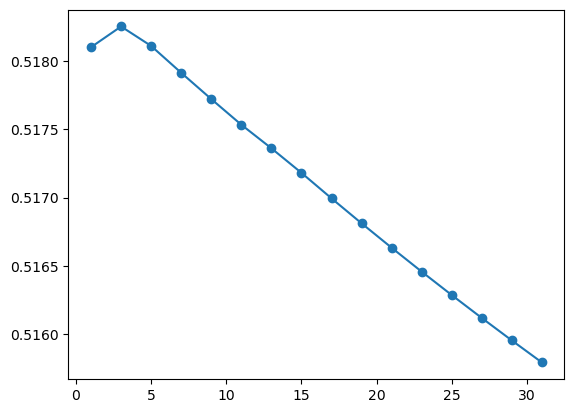

In [746]:
# Plot the accuracies as a function of k
plt.plot([i for i in range(1, 32, 2)], accuracies, marker = 'o')
# Display plot
plt.show()